<a href="https://colab.research.google.com/github/sowmyarshetty/NNClass/blob/main/describing_america_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# Import dependencies
import nltk
import spacy
import pandas as pd
from collections import Counter
from nltk.corpus import inaugural
import nltk
nltk.download('punkt_tab')
# Download NLTK's inaugural corpus
nltk.download("inaugural")

# Load the English language model for spaCy
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


##  Retrieve the documents IDs and text of the U.S. presidential inaugural addresses

In [16]:
# Retrieve the IDs of inaugural addresses
ids = inaugural.fileids()

# Retrieve the text of all the inaugural addresses
texts = [inaugural.raw(id) for id in ids]

# Get the length of the ids and text
print(len(ids), len(texts))

60 60


In [17]:
# Display sample inaugural address
print(ids[10])
print(texts[10])

1829-Jackson.txt
Fellow citizens, about to undertake the arduous duties that I have been appointed to perform by the choice of a free people, I avail myself of this customary and solemn occasion to express the gratitude which their confidence inspires and to acknowledge the accountability which my situation enjoins. While the magnitude of their interests convinces me that no thanks can be adequate to the honor they have conferred, it admonishes me that the best return I can make is the zealous dedication of my humble abilities to their service and their good.

As the instrument of the Federal Constitution it will devolve on me for a stated period to execute the laws of the United States, to superintend their foreign and their confederate relations, to manage their revenue, to command their forces, and, by communications to the Legislature, to watch over and to promote their interests generally. And the principles of action by which I shall endeavor to accomplish this circle of duties i

## The Most Frequent Adjectives from each Inaugural Address

In [18]:
# Use the most_common_adjs function to tokenize the text, creates a list of with all the adjectives,
# and retrieve the most common adjectives and their frequency.
def most_common_adjs(text):
    """
    Finds and returns the most common adjective in the given text.

    Args:
        text (str): The input text from which adjectives will be extracted.

    Returns:
        tuple: A tuple containing the most common adjectives and their frequency.
               The tuple has the format (adjective, frequency).

    Example:
    >>> text = "The quick brown fox jumps over the lazy dog. The fast fox is brown."
    >>> most_common_adj(text)
    ('brown', 2)
    """
    # Tokenizes text and parse each token
    doc = nlp(text)

    # Creates a list with all the adjectives in the text
    adjs = [token.text.lower() for token in doc if token.pos_ == 'ADJ']

    # Retrieves the most frequent adjective in the adjectives list using the Counter module
    most_common_adj = Counter(adjs).most_common(1)[0]

    return most_common_adj


In [19]:
# Create a list of the most common adjective for each inaugural address
common_adjs = [most_common_adjs(text) for text in texts]

# Print the common adjectives.
print(common_adjs)

[('public', 6), ('fellow', 1), ('foreign', 8), ('own', 6), ('public', 14), ('public', 6), ('other', 4), ('great', 20), ('great', 26), ('other', 10), ('public', 8), ('fellow', 3), ('other', 8), ('other', 26), ('free', 12), ('own', 5), ('great', 8), ('great', 11), ('such', 15), ('other', 3), ('best', 5), ('best', 5), ('political', 10), ('great', 11), ('public', 11), ('public', 17), ('public', 8), ('great', 15), ('american', 7), ('great', 5), ('proper', 15), ('great', 14), ('own', 15), ('new', 13), ('great', 15), ('other', 9), ('national', 9), ('good', 7), ('human', 5), ('simple', 2), ('free', 11), ('free', 21), ('own', 9), ('new', 7), ('old', 7), ('new', 8), ('new', 15), ('new', 9), ('other', 4), ('new', 9), ('new', 14), ('new', 9), ('new', 29), ('common', 5), ('own', 9), ('new', 11), ('new', 6), ('american', 9), ('american', 7), ('american', 13)]


In [20]:
# Use list comprehensions to retrieve each adjective and the number of occurrences for each text in separate lists.
adjs = [common_adjs[i][0] for i, _ in enumerate(common_adjs)]
frequency = [common_adjs[i][1] for i, _ in enumerate(common_adjs)]

In [21]:
# Save the year and president as 'inaugural_address' in the following format "1789-Washington"
inaugural_address = [id.replace(".txt", "") for id in ids]

In [22]:
# Create a DataFrame called, adjs_df, that has columns to hold the
# inaugural addresses, the common adjective, and the number of times each adjective appears.
common_adjs_df = pd.DataFrame(
    {
        'inaugural address':inaugural_address,
        'adjective':adjs,
        'frequency':frequency
    }
)

# Sort the DataFrame to display the top 10 adjectives.
presidential_adjs = common_adjs_df.sort_values(by=['frequency'], ascending=False).reset_index(drop=True)

# Display the first ten rows.
presidential_adjs.head(10)

,inaugural address,adjective,frequency
0,1997-Clinton,new,29
1,1821-Monroe,great,26
2,1841-Harrison,other,26
3,1953-Eisenhower,free,21
4,1817-Monroe,great,20
5,1889-Harrison,public,17
6,1909-Taft,proper,15
7,1861-Lincoln,such,15
8,1973-Nixon,new,15
9,1925-Coolidge,great,15


## Most Common Adjectives Used in Inaugural Addresses

In [23]:
# Use the all_adjs function to retrieve all the adjectives in a given text.
def all_adjs(text):
    """
    This function retrieves all the adjectives in the given text.

    Args:
        text (string): The text to analyze.

    Returns:
        list: A list containing all the adjectives found in the text. Adjectives
              are represented as lowercase strings.
    Example:
    >>> text = "The quick brown fox jumps over the lazy dog. The fast fox is brown."
    >>> all_adjs(text)
    ['quick', 'brown', 'lazy', 'fast', 'brown']
    """

    # Tokenize the text and parse each token
    doc = nlp(text)

    # Create a list with all the adjectives in the text
    adjs = [token.text.lower() for token in doc if token.pos_ == 'ADJ']

    return adjs

In [24]:
# Create an empty list to store all the adjectives
all_adjectives = []

# Use a for loop that sends the "text" of the inaugural addresses to the all_adj() function
# and concatenates the returned adjectives to the all_adjectives list.
for text in texts:
    all_adjectives = all_adjectives + all_adjs(text)

# Print sample data
all_adjectives[:10]

['greater',
 '14th',
 'present',
 'fondest',
 'flattering',
 'immutable',
 'necessary',
 'dear',
 'frequent',
 'gradual']

In [25]:
# Create a variable, most_freq_adjectives, that stores the three most frequent adjectives
# used in the inaugural addresses by using the most_common() function from the Counter module.
most_freq_adjectives = Counter(all_adjectives).most_common(3)

# Print the three most frequent adjectives
print(most_freq_adjectives)

[('great', 342), ('other', 275), ('own', 248)]


In [26]:
# Import the word_tokenize module from NLTK
from nltk.tokenize import word_tokenize
# Use the get_word_counts function to count the occurrences of a word in text.
def get_word_counts(text, word):
    """
    This function counts the occurrences of a word in a text.

    Args:
        text (string): The text where word counts will be analyzed.
        word (string): The word to look into the text.

    Returns:
        word_count (int): The counts of the word in the given text.

    Example:
    >>> text = "The quick brown fox jumps over the lazy dog. The quick brown dog is happy."
    >>> word = "quick"
    >>> get_word_counts(text, word)
    2
    """

    # Use the word_tokenize module from NLTK to tokenize the text
    tok = word_tokenize(text)

    # Create a list with all the tokens retrieved from the text
    tok = [word.lower() for word in tok]

    # Count the occurrences of the word in the text
    word_count = tok.count(word)

    return word_count

In [27]:
# Use list comprehensions to create a list with the counts of each top adjective in the inaugural addresses
great_counts = [get_word_counts(text,'great') for text in texts]
other_counts = [get_word_counts(text,'other') for text in texts]
own_counts = [get_word_counts(text,'own') for text in texts]

# Display sample data
print(f"Great counts sample data: {great_counts[:5]}")
print(f"Other counts sample data: {other_counts[:5]}")
print(f"Own counts sample data: {own_counts[:5]}")

Great counts sample data: [3, 0, 5, 1, 1]
Other counts sample data: [1, 0, 2, 1, 6]
Own counts sample data: [2, 0, 4, 6, 5]


## Analyze Adjectives Over Time

In [28]:
# Create a Python list dates to store the year when every inaugural address was delivered.
dates = [id.split('-')[0] for id in ids]

# Print sample data
print(dates[:5])

['1789', '1793', '1797', '1801', '1805']


In [29]:
# Create a Python list called, presidents,  to store the last name of each U.S. President from each inaugural address.
presidents = [id.split('-')[1].split('.')[0] for id in ids]

# Print sample data
print(presidents[:5])

['Washington', 'Washington', 'Adams', 'Jefferson', 'Jefferson']


In [30]:
# Create a DataFrame presidential_adjs_df, that contains columns that hold the President's last name
# and the number of times each adjective appears in the Presidents' inaugural address.
presidential_adjs_df = {
    'President': presidents,
    'great':great_counts,
    'other':other_counts,
    'own': own_counts
}

# Set the index of the presidential_adjs_df DataFrame equal to the year in the dates list.
presidential_adjs_df = pd.DataFrame(presidential_adjs_df, index=pd.to_datetime(dates).year)

# Display same data
presidential_adjs_df.head()

,President,great,other,own
1789,Washington,3,1,2
1793,Washington,0,0,0
1797,Adams,5,2,4
1801,Jefferson,1,1,6
1805,Jefferson,1,6,5


<Axes: title={'center': 'Most Common Adjectives Used in the U.S. Presidential Inaugural Addresses'}>

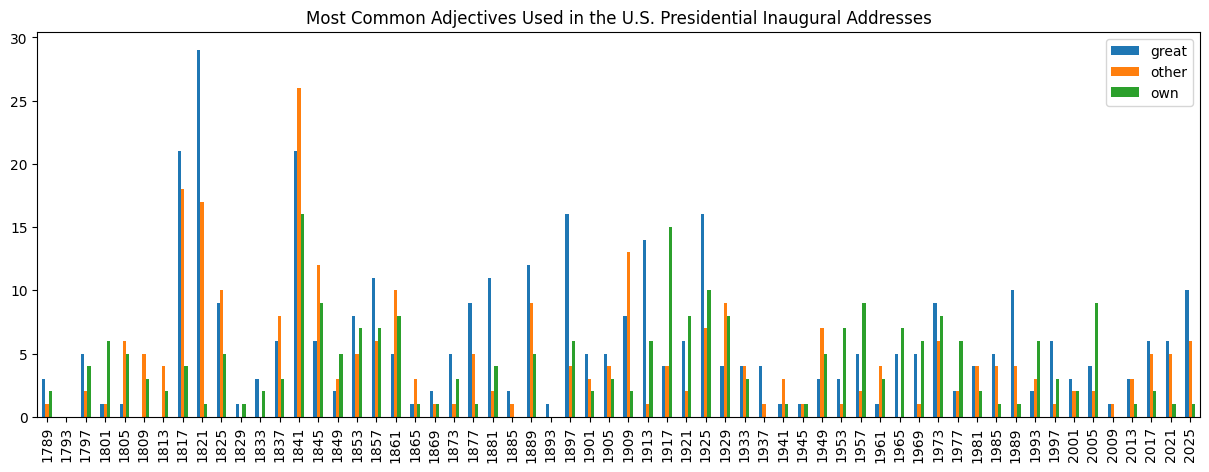

In [31]:
# Create a bar plot that displays the most common adjectives used throughout the U.S. presidential inaugural addresses.
presidential_adjs_df.plot.bar(
    title = "Most Common Adjectives Used in the U.S. Presidential Inaugural Addresses",
    figsize = (15, 5))

## The Most Common Adjectives Describing America

In [32]:
def describe_america(text):
    """
    This function retrieves the adjectives in the text that describe the word 'America'.

    Args:
        text (string): The text to analyze.

    Returns:
        adjs (list): A list of the adjectives that describe the word "America" in the text.
    """

    # Use the spaCy English language model to tokenize the text and parse each token.
    doc = nlp(text)

    # Create a list with all the adjectives in the text of each inaugural address that describe the word "America".
    adjs = [token.text.lower() for token in doc if (token.pos_ == 'ADJ' and token.head.text == 'America')]

    return adjs

In [33]:
# Create an empty list to store the adjectives
america_adjectives = []

# Write a for loop that sends the "text" of the inaugural addresses to the describe_america() function
# and concatenates the returned adjectives to the america_adjectives list.
for text in texts:
    america_adjectives = america_adjectives + describe_america(text)

# Print the list of the adjectives describing the word 'America'
america_adjectives

['productive', 'alert', 'illumined', 'strong', 'stronger', 'rich']